0: 800x800 (no detections), 223.4ms
Speed: 4.0ms preprocess, 223.4ms inference, 3.6ms postprocess per image at shape (1, 3, 800, 800)
0: 800x800 (no detections), 268.3ms
Speed: 3.5ms preprocess, 268.3ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
0: 800x800 (no detections), 173.8ms
Speed: 4.9ms preprocess, 173.8ms inference, 0.3ms postprocess per image at shape (1, 3, 800, 800)


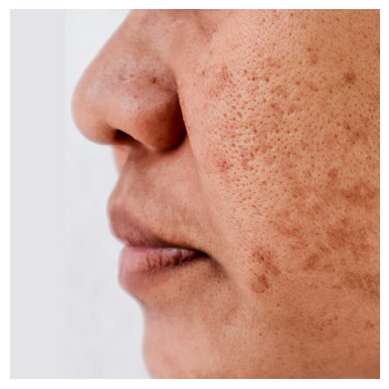

No specific skin conditions detected.


In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 models for pigmentation, dark spot, and acne detection
pigmentation_model = YOLO('p-best.pt')  # Path to the pigmentation YOLO model
darkspot_model = YOLO('best.pt')  # Path to the dark spot YOLO model
acne_model = YOLO('acne-best.pt')  # Path to the acne YOLO model

# Preprocess input image for YOLO models
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistency with PIL display
    return img, img_rgb

# Run object detection using YOLO
def detect_objects(model, image):
    results = model(image)  # Perform inference using YOLO
    boxes = results[0].boxes.data.cpu().numpy()  # Bounding boxes and confidence scores
    return boxes

# Draw bounding boxes on the image
def draw_boxes(img, boxes, color=(255, 0, 0)):
    img_with_boxes = img.copy()
    for box in boxes:
        x1, y1, x2, y2, confidence, cls = box
        cv2.rectangle(img_with_boxes, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
    return img_with_boxes

# Main function to analyze skin for pigmentation, dark spots, and acne
def analyze_skin(image_path):
    # Preprocess the input image
    img, img_rgb = preprocess_image(image_path)

    # Run pigmentation, dark spot, and acne detection
    pigmentation_boxes = detect_objects(pigmentation_model, img_rgb)
    darkspot_boxes = detect_objects(darkspot_model, img_rgb)
    acne_boxes = detect_objects(acne_model, img_rgb)

    # Initialize a list to hold detected conditions
    detected_conditions = []

    # Draw bounding boxes and check for conditions
    if len(pigmentation_boxes) > 0:
        img_rgb = draw_boxes(img_rgb, pigmentation_boxes, color=(255, 0, 0))  # Blue for pigmentation
        detected_conditions.append("Pigmentation")
    if len(darkspot_boxes) > 0:
        img_rgb = draw_boxes(img_rgb, darkspot_boxes, color=(0, 255, 0))  # Green for dark spots
        detected_conditions.append("Dark Spots")
    if len(acne_boxes) > 0:
        img_rgb = draw_boxes(img_rgb, acne_boxes, color=(0, 0, 255))  # Red for acne
        detected_conditions.append("Acne")

    # Display the results
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Display detected conditions
    if detected_conditions:
        print("Detected skin conditions:", ", ".join(detected_conditions))
    else:
        print("No specific skin conditions detected.")

if __name__ == "__main__":
    # Replace with your image path
    image_path = '/Users/vidit/Documents/College/Skinalyze/Model/Test Images/test2.jpg'
    analyze_skin(image_path)